# Deepl Learning classifier Probleme FashionMNIST

In [107]:
from torchvision.datasets import FashionMNIST
import torchvision
import torch
from torch import nn
from torch.nn import functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

##### Transform the image in Tensor and Normalisation

In [108]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

### Load of the Dataset and seperation of this

In [109]:
train_ds = FashionMNIST(root='./data',train=True,transform=transform,download=True)
test_ds = FashionMNIST(root='./data',train=False,transform=transform,download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=6, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_ds, batch_size=6, shuffle=False)

classes = ("T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot")

#### Representation of the dataset

In [110]:
def imshow(img,labels):
    img = img/2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    plt.show()


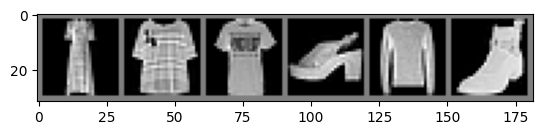

Dress T-shirt/top T-shirt/top Sandal Pullover Ankle boot


In [111]:
dataiter = iter(train_loader)
images,labels = dataiter.__next__()
imshow(torchvision.utils.make_grid(images),labels)
print(" ".join(f'{classes[labels[j]]:5s}' for j in range(6)))

#### Creation of the Netz

In [112]:
class Netz_(nn.Module):
    def __init__(self):
        super(Netz_,self).__init__()
        self.conv1 = nn.Conv2d(1,8,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,3)
        self.dropout = nn.Dropout(0.25)
        self.linear1 = nn.Linear(16*11*11,508)
        self.linear2 = nn.Linear(508,128)
        self.dropout = nn.Dropout(0.25)
        self.linear3 = nn.Linear(128,10)
    def forward(self,x):
        x = x.view(-1, 1, 28, 28)
        x = F.leaky_relu(self.conv1(x))
        x = self.pool(x)
        x = F.leaky_relu(self.conv2(x))
        x = self.dropout(x)
        x = torch.flatten(x,1)
        x = F.leaky_relu(self.linear1(x))
        x = F.leaky_relu(self.linear2(x))
        x = self.dropout(x)
        x = F.log_softmax(self.linear3(x),dim=-1)
        return x

#### Creation of the model

In [113]:
model = Netz_()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=0.0001)

In [114]:
num_epochs = 5
for epoch in range(num_epochs):
    train_loss = 0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs} , train loss: {train_loss/len(train_loader):.4f}")  

Epoch 1/5 , train loss: 0.4363
Epoch 2/5 , train loss: 0.3217
Epoch 3/5 , train loss: 0.2902
Epoch 4/5 , train loss: 0.2761
Epoch 5/5 , train loss: 0.2661


#### Evaluation of the Netz

In [115]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _,prediction = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
print(f"accurancy of the netz : {(correct/total)*100:0.2f}%")

accurancy of the netz : 88.92%


In [116]:
correct_prediction = {classname: 0 for classname in classes}
total_prediction = {classname: 0 for classname in classes}
accurancy_prediction = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _,predictions = torch.max(outputs.data,1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_prediction[classes[label]]+=1
            total_prediction[classes[label]]+=1
for classname, count in correct_prediction.items():
    accuracy = 100 * float(count) / total_prediction[classname]
    accurancy_prediction.append(accuracy)
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: T-shirt/top is 89.0 %
Accuracy for class: Trouser is 98.4 %
Accuracy for class: Pullover is 91.7 %
Accuracy for class: Dress is 91.7 %
Accuracy for class: Coat  is 83.1 %
Accuracy for class: Sandal is 96.4 %
Accuracy for class: Shirt is 50.7 %
Accuracy for class: Sneaker is 97.6 %
Accuracy for class: Bag   is 96.2 %
Accuracy for class: Ankle boot is 95.0 %


#### amelioration of the Netz

In [117]:
class Netz(nn.Module):
    def __init__(self):
        super(Netz,self).__init__()
        self.conv1 = nn.Conv2d(1,8,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,3)
        self.linear1 = nn.Linear(16*11*11,508)
        self.linear2 = nn.Linear(508,10)
    def forward(self,x):
        x = x.view(-1, 1, 28, 28)
        x = F.leaky_relu(self.conv1(x))
        x = self.pool(x)
        x = F.leaky_relu(self.conv2(x))
        x = torch.flatten(x,1)
        x = F.leaky_relu(self.linear1(x))
        x = F.log_softmax(self.linear2(x),dim=-1)
        return x

#### Creation of the model

In [118]:
model = Netz()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=0.0001)

In [119]:
next(iter(train_loader))[0].shape

torch.Size([6, 1, 28, 28])

In [120]:
num_epochs = 5
for epoch in range(num_epochs):
    train_loss = 0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs} , train loss: {train_loss/len(train_loader):.4f}")  


Epoch 1/5 , train loss: 0.3961
Epoch 2/5 , train loss: 0.2781
Epoch 3/5 , train loss: 0.2417
Epoch 4/5 , train loss: 0.2215
Epoch 5/5 , train loss: 0.2044


#### Evaluation of the Netz

In [121]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _,prediction = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (prediction == labels).sum().item()
print(f"accurancy of the netz : {(correct/total)*100:0.2f}%")

accurancy of the netz : 90.72%


### Representation of the Test

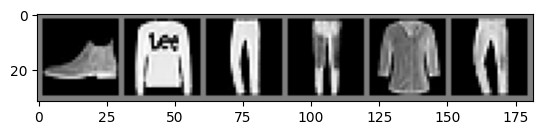

Ankle boot Pullover Trouser Trouser Shirt Trouser


In [122]:
dataiter = iter(test_loader)
images,labels = dataiter.__next__()
imshow(torchvision.utils.make_grid(images),labels)
print(" ".join(f'{classes[labels[j]]:5s}' for j in range(6)))

In [123]:
correct_prediction = {classname: 0 for classname in classes}
total_prediction = {classname: 0 for classname in classes}
accurancy_prediction = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _,predictions = torch.max(outputs.data,1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_prediction[classes[label]]+=1
            total_prediction[classes[label]]+=1
for classname, count in correct_prediction.items():
    accuracy = 100 * float(count) / total_prediction[classname]
    accurancy_prediction.append(accuracy)
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: T-shirt/top is 86.4 %
Accuracy for class: Trouser is 97.4 %
Accuracy for class: Pullover is 87.9 %
Accuracy for class: Dress is 92.6 %
Accuracy for class: Coat  is 87.0 %
Accuracy for class: Sandal is 93.8 %
Accuracy for class: Shirt is 71.2 %
Accuracy for class: Sneaker is 98.0 %
Accuracy for class: Bag   is 97.2 %
Accuracy for class: Ankle boot is 95.7 %
